In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np 

In [35]:
N = 10000
x = torch.linspace(0, 2, N).view(-1, 1).requires_grad_(True)

In [36]:
def exact_solution(x):
    return (torch.exp(-x/5))*(torch.sin(x))

In [37]:
N_data = 30
noise_level = 0.04
x_data = torch.linspace(0, 2, N_data)
x_noisy = exact_solution(x_data) + noise_level*(np.random.randn(N_data))

Text(0, 0.5, '$\\psi$')

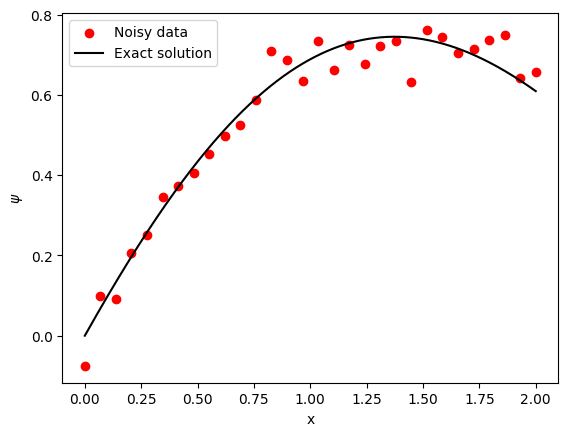

In [38]:
plt.scatter(x_data, x_noisy, color='red', label="Noisy data")
plt.plot(x.detach().numpy(), exact_solution(x).detach().numpy(), color="black", label="Exact solution")
plt.legend()
plt.xlabel("x")
plt.ylabel("$\psi$")

In [43]:
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.net(x)
model = PINN()

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [45]:
def derivative (y, x):
    return torch.autograd.grad(
        y, x,
        grad_outputs=torch.ones_like(y),
        create_graph=True,
    )[0]

Epoch 0 | Loss: 0.415108


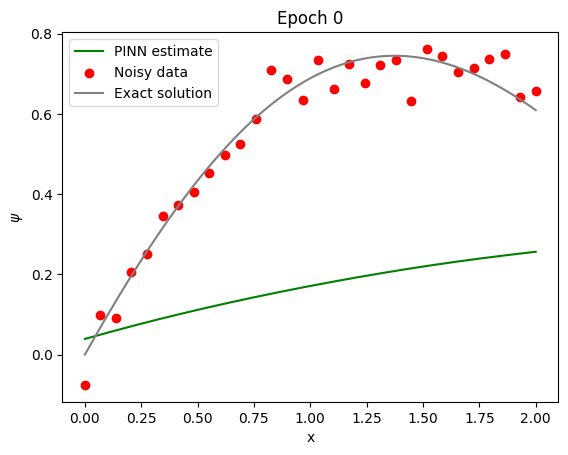

Epoch 100 | Loss: 0.087297


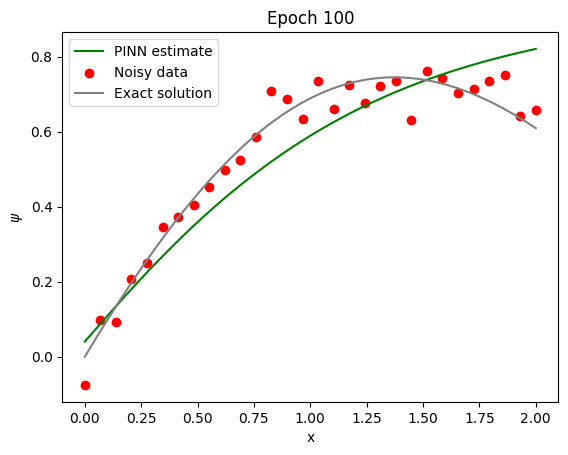

Epoch 200 | Loss: 0.038917


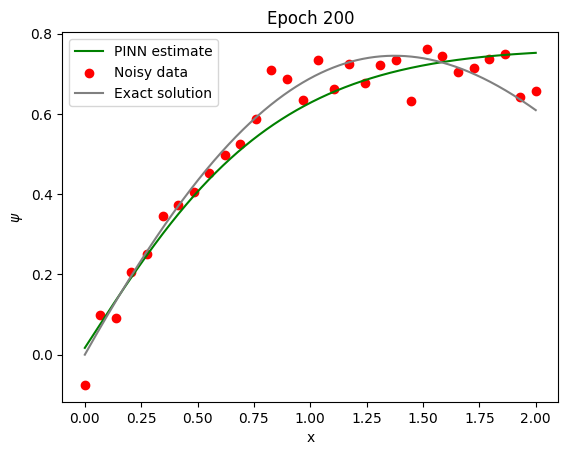

Epoch 300 | Loss: 0.012755


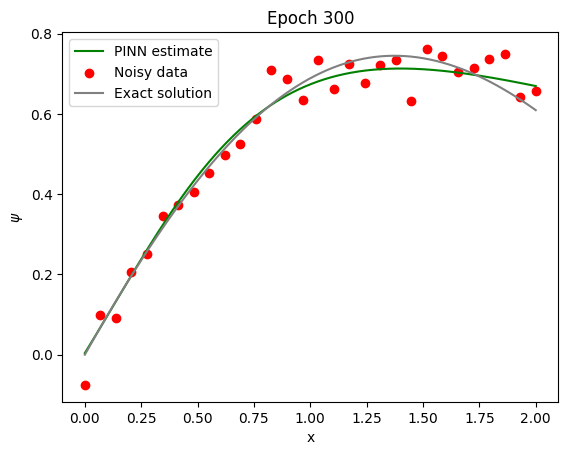

Epoch 400 | Loss: 0.006743


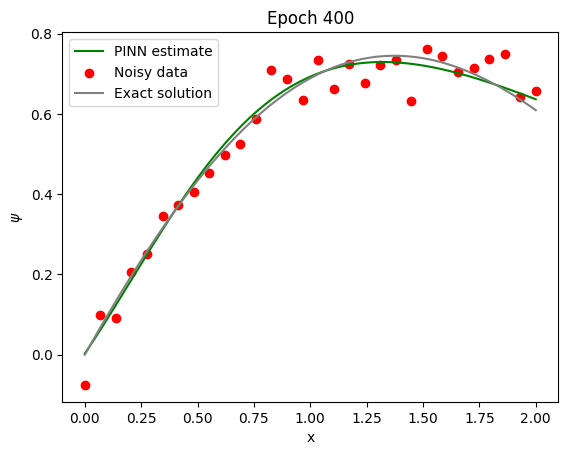

Epoch 500 | Loss: 0.005144


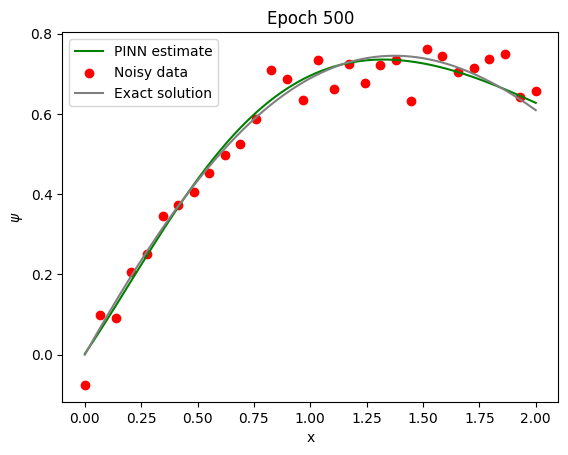

Epoch 600 | Loss: 0.004061


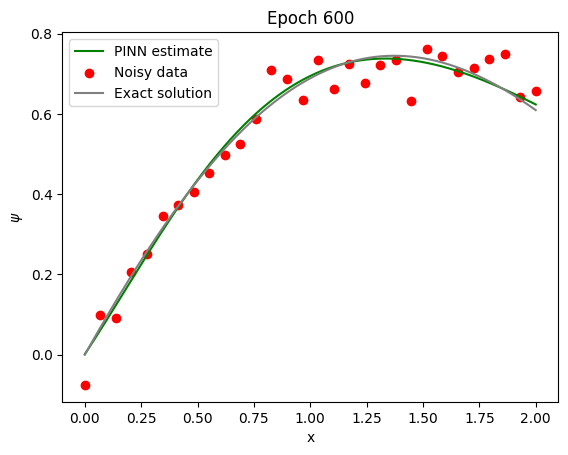

Epoch 700 | Loss: 0.003265


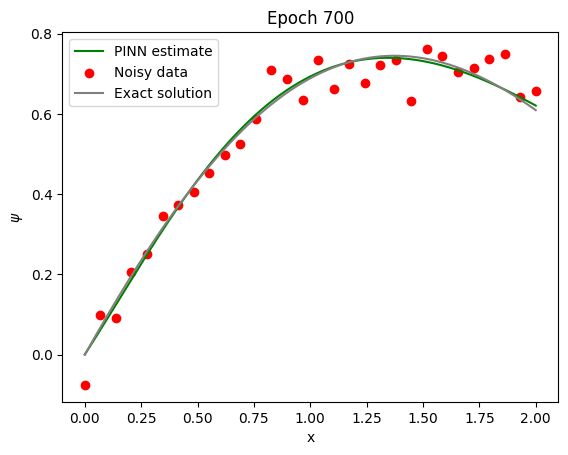

Epoch 800 | Loss: 0.002710


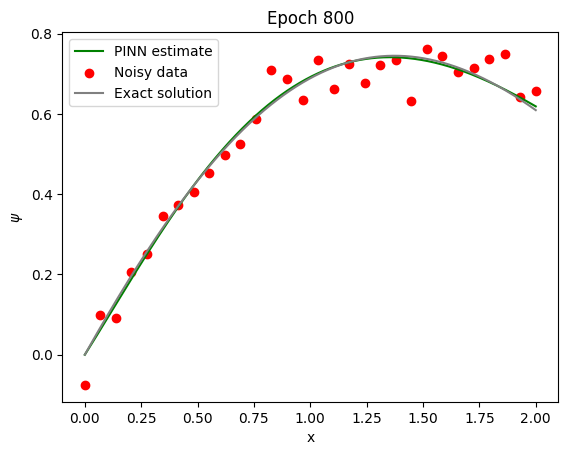

Epoch 900 | Loss: 0.002349


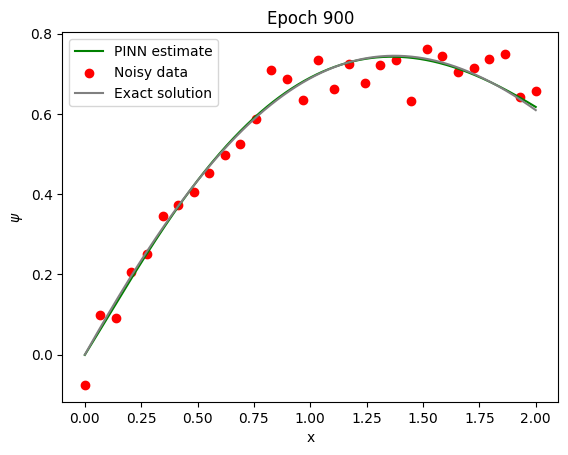

In [ ]:
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    psi = model(x)
    dpsidx = derivative(psi, x)
    loss_pde = torch.mean(((dpsidx + (psi/5))-((torch.exp(-x/5))*(torch.cos(x))))**2)
    x0 = torch.zeros(1, 1, dtype=torch.float32, requires_grad=False)
    loss_bc = torch.mean(model(x0)**2)
    loss_data = torch.mean((model(x_data.view(-1, 1).requires_grad_(True))-(x_noisy.view(-1, 1).requires_grad_(True)))**2)

    loss = loss_pde + loss_bc + loss_data
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.6f}")
        plt.plot(x.detach().numpy(), model(x).detach().numpy(), color='green', label="PINN estimate")
        plt.scatter(x_data, x_noisy, color='red', label="Noisy data")
        plt.plot(x.detach().numpy(), exact_solution(x).detach().numpy(), color="grey", label="Exact solution")
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("$\psi$")
        plt.title(f"Epoch {epoch}")
        plt.show()

Text(0, 0.5, '$\\psi$')

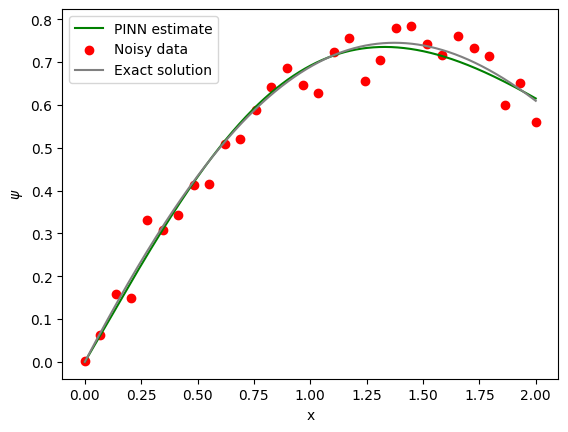

In [24]:
plt.plot(x.detach().numpy(), model(x).detach().numpy(), color='green', label="PINN estimate")
plt.scatter(x_data, x_noisy, color='red', label="Noisy data")
plt.plot(x.detach().numpy(), exact_solution(x).detach().numpy(), color="grey", label="Exact solution")
plt.legend()
plt.xlabel("x")
plt.ylabel("$\psi$")